In [5]:
import yfinance as yf


In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [7]:
import seaborn as sns

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import gradio as gr

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
usd_inr = yf.download('USDINR=X', start='2024-01-01', end='2024-12-31', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [14]:
type(usd_inr)

pandas.core.frame.DataFrame

In [15]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2024-01-01,83.240601,83.360298,83.035004,83.248596,0
2024-01-08,83.076103,83.189697,82.779099,83.191101,0
2024-01-15,83.160599,83.230797,82.809998,82.872101,0
2024-01-22,83.146103,83.222504,81.513702,83.124702,0
2024-01-29,82.927597,83.212601,82.815002,83.121300,0


In [16]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2024-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDINR=X)   53 non-null     float64
 1   (High, USDINR=X)    53 non-null     float64
 2   (Low, USDINR=X)     53 non-null     float64
 3   (Open, USDINR=X)    53 non-null     float64
 4   (Volume, USDINR=X)  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [17]:
usd_inr.reset_index(inplace=True)

In [18]:
usd_inr=usd_inr[['Date','Close']]
usd_inr.columns = ['Date','USD_INR']

In [19]:
usd_inr.head()

,Date,USD_INR
0,2024-01-01,83.240601
1,2024-01-08,83.076103
2,2024-01-15,83.160599
3,2024-01-22,83.146103
4,2024-01-29,82.927597


In [20]:
import pandas as pd
gold_dataset = pd.read_csv("Gold vs USDINR.csv")

In [21]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [22]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [23]:
gold_dataset['Goldrate'] = gold_dataset['Goldrate'].replace('₹', '', regex=True).replace(',','', regex=True).astype(float)

<Axes: ylabel='USD_INR'>

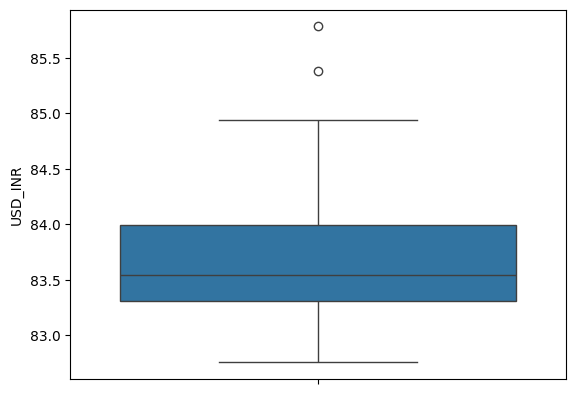

In [24]:
sns.boxplot(gold_dataset['USD_INR'])

In [25]:
gold_dataset['USD_INR'].min()

82.75229645

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

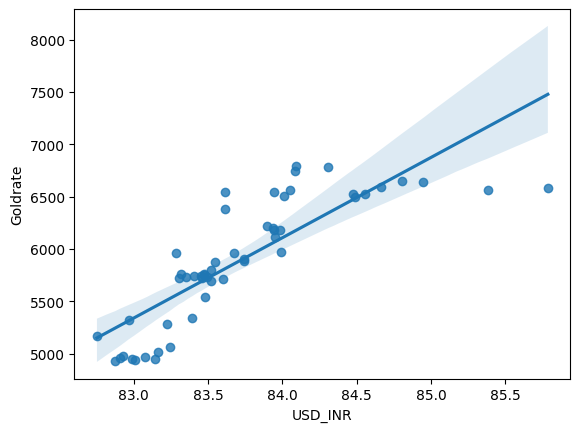

In [26]:
sns.regplot(x='USD_INR', y='Goldrate', data=gold_dataset)

In [27]:
X = gold_dataset[['USD_INR']]
y = gold_dataset[['Goldrate']]

In [28]:
X

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597
5,82.985298
6,83.009598
7,82.872299
8,82.910400
9,82.752296


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [30]:
X_train.shape, X_test.shape

((47, 1), (6, 1))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_test_scaled

array([[-0.37619593],
       [ 0.53097266],
       [ 1.31302272],
       [-0.49602609],
       [ 0.58955971],
       [-1.12965796]])

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [35]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
regressor.coef_

array([[469.20755762]])

In [38]:
regressor.intercept_

array([5878.57340426])

In [39]:
# y = mx+b
m = regressor.coef_[0][0]
b = regressor.intercept_[0]

In [40]:
m,b

(np.float64(469.2075576153299), np.float64(5878.573404255313))

In [41]:
x_train_predict = regressor.predict(X_train_scaled)

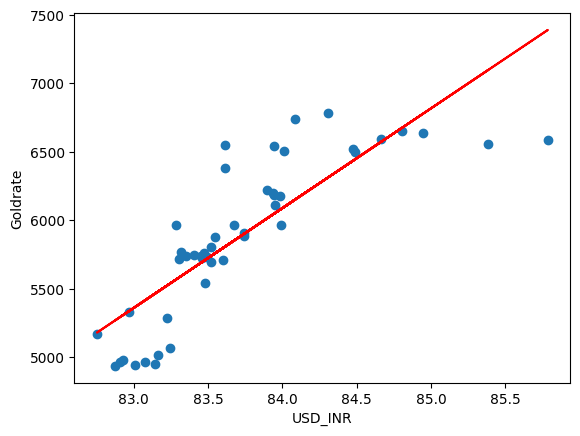

In [42]:
plt.scatter(X_train,y_train)
plt.plot(X_train, x_train_predict, color='r')
plt.xlabel("USD_INR")
plt.ylabel("Goldrate")

plt.show()

In [43]:
X_test_predicted = regressor.predict(X_test_scaled)

In [44]:
X_test_predicted

array([[5702.05943009],
       [6127.70978702],
       [6494.65358787],
       [5645.83421639],
       [6155.1992781 ],
       [5348.52935023]])

In [45]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test, X_test_predicted)

141948.22993388725

In [48]:
from sklearn.model_selection import RandomizedSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [49]:
search = RandomizedSearchCV(regressor, param_space, n_iter=50, cv=5)

In [53]:
search.fit(X_train_scaled, y_train)

C:\Users\kirut\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [54]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [55]:
tuned_model = LinearRegression(positive= True, n_jobs= 1, fit_intercept= True, copy_X= True)

In [56]:
tuned_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1, positive=True)

In [57]:
tuned_model.coef_

array([[469.20755762]])

In [58]:
tuned_model.intercept_

array([5878.57340426])

In [59]:
import pickle

In [60]:
#pickle.dump(regressor,open('regressor.pkl','wb'))

In [61]:
regressor_reloaded = pickle.load(open('regressor.pkl','rb'))

In [62]:
regressor_reloaded.coef_

array([[469.20755762]])

In [63]:
#pickle.dump(scaler,open('scaler.pkl','wb'))

In [64]:
scaler=pickle.load(open('scaler.pkl','rb'))

In [65]:
def calculate_gold_rate(usd_inr):
    scaled_input = scaler.transform(np.array(usd_inr).reshape(1,-1))
    return round(regressor.predict(scaled_input)[0][0],2)

In [66]:
calculate_gold_rate(80)

C:\Users\kirut\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(3171.57)

In [67]:
import gradio as gr

demo = gr.Interface(
    fn=calculate_gold_rate,
    inputs=["number"],
    outputs=["number"],
    title="How much is 1g gold now?"
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\kirut\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
